In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from catboost import CatBoostRegressor
from xgboost import  XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

In [79]:
df = pd.read_csv("C:\\Users\\DELL\\Desktop\\ML Project\\notebook\\data\\student.csv")

In [76]:
df.head()

,StudentID,Gender,Age,StudyHoursPerWeek,AttendanceRate,GPA,Major,PartTimeJob,ExtraCurricularActivities
0,1,Male,24,37,90.75,3.47,Arts,Yes,No
1,2,Female,22,37,74.90,2.32,Education,No,No
2,3,Male,22,10,53.36,2.38,Business,No,No
3,4,Male,24,10,70.26,3.46,Science,Yes,No
4,5,Male,18,19,74.87,2.31,Education,Yes,No


In [80]:
df.drop(columns = 'StudentID' , axis=1 , inplace = True)

In [81]:
df

,Gender,Age,StudyHoursPerWeek,AttendanceRate,GPA,Major,PartTimeJob,ExtraCurricularActivities
0,Male,24,37,90.75,3.47,Arts,Yes,No
1,Female,22,37,74.90,2.32,Education,No,No
2,Male,22,10,53.36,2.38,Business,No,No
3,Male,24,10,70.26,3.46,Science,Yes,No
4,Male,18,19,74.87,2.31,Education,Yes,No
...,...,...,...,...,...,...,...,...
495,Male,22,37,76.61,2.97,Science,No,No
496,Male,23,11,56.29,3.20,Science,No,No
497,Female,20,6,56.64,3.20,Science,No,Yes
498,Male,22,18,57.18,2.05,Business,No,Yes


In [56]:
df

,Gender,Age,StudyHoursPerWeek,AttendanceRate,GPA,Major,PartTimeJob,ExtraCurricularActivities
0,Male,24,37,90.75,86.75,Arts,Yes,No
1,Female,22,37,74.90,58.00,Education,No,No
2,Male,22,10,53.36,59.50,Business,No,No
3,Male,24,10,70.26,86.50,Science,Yes,No
4,Male,18,19,74.87,57.75,Education,Yes,No
...,...,...,...,...,...,...,...,...
495,Male,22,37,76.61,74.25,Science,No,No
496,Male,23,11,56.29,80.00,Science,No,No
497,Female,20,6,56.64,80.00,Science,No,Yes
498,Male,22,18,57.18,51.25,Business,No,Yes


In [82]:
X = df.drop(columns='GPA',axis =1 )
y= df['GPA']

In [83]:
X

,Gender,Age,StudyHoursPerWeek,AttendanceRate,Major,PartTimeJob,ExtraCurricularActivities
0,Male,24,37,90.75,Arts,Yes,No
1,Female,22,37,74.90,Education,No,No
2,Male,22,10,53.36,Business,No,No
3,Male,24,10,70.26,Science,Yes,No
4,Male,18,19,74.87,Education,Yes,No
...,...,...,...,...,...,...,...
495,Male,22,37,76.61,Science,No,No
496,Male,23,11,56.29,Science,No,No
497,Female,20,6,56.64,Science,No,Yes
498,Male,22,18,57.18,Business,No,Yes


In [84]:
X.shape

(500, 7)

In [85]:
y

0      3.47
1      2.32
2      2.38
3      3.46
4      2.31
       ... 
495    2.97
496    3.20
497    3.20
498    2.05
499    2.64
Name: GPA, Length: 500, dtype: float64

In [86]:
y.shape

(500,)

In [94]:
# Pipeline for encoding categorical data type and then applying standard scale on a data set i.e column transformer

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

# Custom transformer for Label Encoding
class LabelEncoderTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.encoders = {}

    def fit(self, X, y=None):
        for column in X.columns:
            le = LabelEncoder()
            le.fit(X[column])
            self.encoders[column] = le
        return self

    def transform(self, X):
        X_transformed = X.copy()
        for column, le in self.encoders.items():
            X_transformed[column] = le.transform(X[column])
        return X_transformed


num_feature = X.select_dtypes(exclude='object').columns
cat_feature = X.select_dtypes(include='object').columns

preprocessor = ColumnTransformer(
    transformers=[
        ('label_encoder', LabelEncoderTransformer(), cat_feature),  # Custom Label Encoder for categorical features
        ('scaler', StandardScaler(), num_feature)                    # Standardize numerical features
    ]
)

X = preprocessor.fit_transform(X)

In [95]:
X.shape

(500, 7)

In [96]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y , test_size=0.2,random_state=42)
X_train.shape , X_test.shape


((400, 7), (100, 7))

### Function of evaluation metrics to get the best model


In [97]:

def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [98]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.5466
- Mean Absolute Error: 0.4726
- R2 Score: 0.0196
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.5942
- Mean Absolute Error: 0.5199
- R2 Score: 0.0356


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.5521
- Mean Absolute Error: 0.4778
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.6050
- Mean Absolute Error: 0.5285
- R2 Score: -0.0000


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.5466
- Mean Absolute Error: 0.4726
- R2 Score: 0.0196
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.5942
- Mean Absolute Error: 0.5200
- R2 Score: 0.0355


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.4989
- Mean Absolute Error: 0.4186
- R2 Score: 0.1834
----------------------

In [99]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.035562
2,Ridge,0.035473
8,AdaBoost Regressor,0.000393
1,Lasso,-0.000018
5,Random Forest Regressor,-0.033616
7,CatBoosting Regressor,-0.122010
3,K-Neighbors Regressor,-0.159796
6,XGBRegressor,-0.290768
4,Decision Tree,-0.817731


In [100]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 3.56


Text(0, 0.5, 'Predicted')

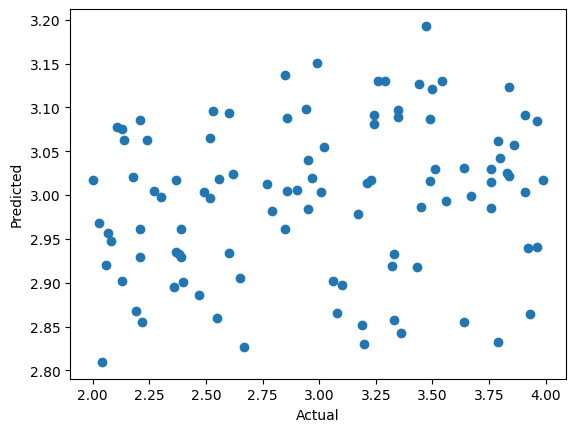

In [101]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='GPA'>

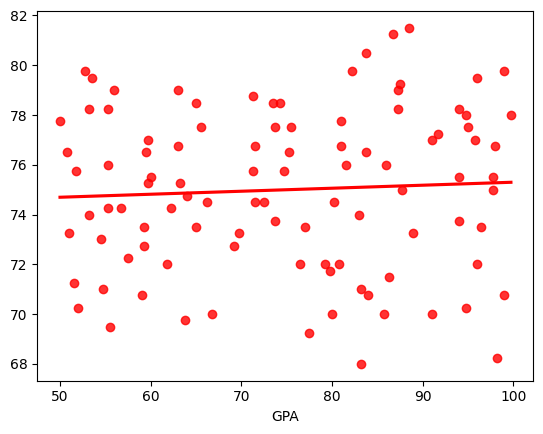

In [72]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

In [102]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
361,2.07,2.957098,-0.887098
73,3.43,2.918194,0.511806
374,2.85,2.961669,-0.111669
155,3.21,3.014215,0.195785
104,2.37,2.935583,-0.565583
...,...,...,...
347,2.90,3.005365,-0.105365
86,3.23,3.017047,0.212953
75,3.64,2.854985,0.785015
438,3.49,3.086180,0.403820


In [110]:
#Feature Engineering

# Encode the gender tag by (male=2, female=1)
df['Encoded_Gender'] = df['Gender'].apply(lambda x: 2 if x == 'Male' else 1)

# Create a binary feature for ExtraCurricularActivities (0 = No, 1 = Yes)
df['ExtraCurricularActivities_Yes'] = df['ExtraCurricularActivities'].apply(lambda x: 1 if x == 'Yes' else 0)

# Create interaction features
df['Gender_Male_ExtraCurricular'] = df['Encoded_Gender'] * df['ExtraCurricularActivities_Yes']

# Create a feature for Male students with no ExtraCurricularActivities
df['Male_No_ExtraCurricular'] = df.apply(lambda row: 1 if row['Gender'] == 'Male' and row['ExtraCurricularActivities'] == 'No' else 0, axis=1)

# Create a feature that for emphasis on both the study hour and the attendace rate
df['StudyHour_Att'] = df['StudyHoursPerWeek'] * df["AttendanceRate"]

#Create Weighting Mapping on the Ordinal Major
major_mapping = {
    'Business': 3,
    'Arts': 2.5,
    'Education': 2,
    'Engineering': 1.5,
    'Science': 1
}

df['Major_Ordinal'] = df['Major'].map(major_mapping)

#Featuring Male student and PartTimeJob (As PartTimeJob has larger impact on male, male=2, female=1)
df['PartTimeJob_Yes'] = df['PartTimeJob'].apply(lambda x: 2 if x == 'Yes' else 1)
df['Male_PartTimeJob'] = df['Encoded_Gender'] * df['PartTimeJob_Yes']
df['Male_NoPartTimeJob'] = df.apply(lambda row: 1 if row['Gender'] == 'Male' and row['PartTimeJob'] == 'No' else 0, axis=1)

#Featuring relationship between GPA and the StudyHour with the effect of different major (Assumption: last time GPA is the only reference)
df["Assumption_1"] = df["GPA"] / (1/df["Major_Ordinal"])

In [111]:
df

,Gender,Age,StudyHoursPerWeek,AttendanceRate,GPA,Major,PartTimeJob,ExtraCurricularActivities,Encoded_Gender,ExtraCurricularActivities_Yes,Gender_Male_ExtraCurricular,Male_No_ExtraCurricular,StudyHour_Att,Major_Ordinal,PartTimeJob_Yes,Male_PartTimeJob,Male_NoPartTimeJob,Assumption_1
0,Male,24,37,90.75,3.47,Arts,Yes,No,2,0,0,1,3357.75,2.5,2,4,0,8.675
1,Female,22,37,74.90,2.32,Education,No,No,1,0,0,0,2771.30,2.0,1,1,0,4.640
2,Male,22,10,53.36,2.38,Business,No,No,2,0,0,1,533.60,3.0,1,2,1,7.140
3,Male,24,10,70.26,3.46,Science,Yes,No,2,0,0,1,702.60,1.0,2,4,0,3.460
4,Male,18,19,74.87,2.31,Education,Yes,No,2,0,0,1,1422.53,2.0,2,4,0,4.620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Male,22,37,76.61,2.97,Science,No,No,2,0,0,1,2834.57,1.0,1,2,1,2.970
496,Male,23,11,56.29,3.20,Science,No,No,2,0,0,1,619.19,1.0,1,2,1,3.200
497,Female,20,6,56.64,3.20,Science,No,Yes,1,1,1,0,339.84,1.0,1,1,0,3.200
498,Male,22,18,57.18,2.05,Business,No,Yes,2,1,2,0,1029.24,3.0,1,2,1,6.150


In [112]:
X = df.drop(columns=['Gender','GPA', 'Major','ExtraCurricularActivities', 'PartTimeJob' ])
y = df['GPA']


In [113]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y , test_size=0.2,random_state=42)
X_train.shape , X_test.shape


((400, 13), (100, 13))

In [114]:

def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [115]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.1752
- Mean Absolute Error: 0.1317
- R2 Score: 0.8993
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1809
- Mean Absolute Error: 0.1372
- R2 Score: 0.9106


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.5499
- Mean Absolute Error: 0.4753
- R2 Score: 0.0077
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.6013
- Mean Absolute Error: 0.5264
- R2 Score: 0.0124


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.1755
- Mean Absolute Error: 0.1308
- R2 Score: 0.8989
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1803
- Mean Absolute Error: 0.1359
- R2 Score: 0.9112


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.4836
- Mean Absolute Error: 0.4039
- R2 Score: 0.2327
-----------------------

In [116]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
5,Random Forest Regressor,0.997287
6,XGBRegressor,0.997227
4,Decision Tree,0.990865
7,CatBoosting Regressor,0.983656
2,Ridge,0.911187
0,Linear Regression,0.910580
8,AdaBoost Regressor,0.815513
1,Lasso,0.012363
3,K-Neighbors Regressor,-0.205486


In [117]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
361,2.07,2.957098,-0.887098
73,3.43,2.918194,0.511806
374,2.85,2.961669,-0.111669
155,3.21,3.014215,0.195785
104,2.37,2.935583,-0.565583
...,...,...,...
347,2.90,3.005365,-0.105365
86,3.23,3.017047,0.212953
75,3.64,2.854985,0.785015
438,3.49,3.086180,0.403820


In [118]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 91.06


Text(0, 0.5, 'Predicted')

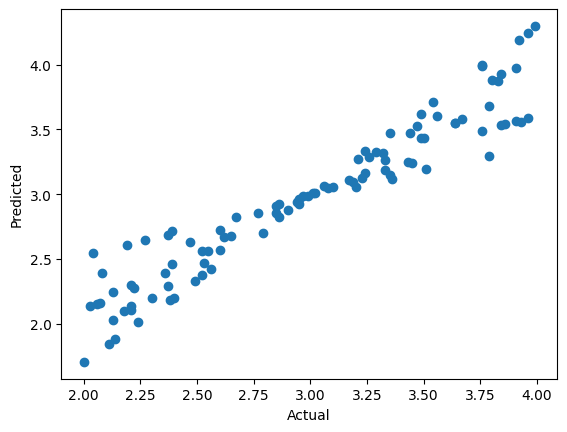

In [119]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='GPA'>

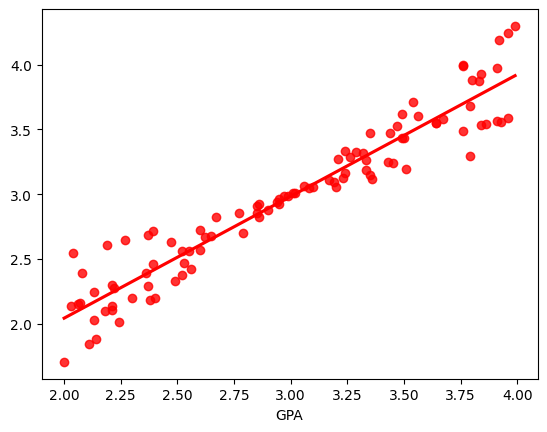

In [120]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')